<a href="https://colab.research.google.com/github/diegobarbo/seriesMethodsPandas/blob/main/2_Series_Methods_And_Handling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# 1. Reading In Data With read_csv()

In [ ]:
# https://andybek.com/pandas-drinks

In [ ]:
pd.read_csv('https://andybek.com/pandas-drinks')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,NaN,NaN,NaN,NaN
1,Albania,89.0,132.0,54.0,4.9
2,Algeria,25.0,NaN,14.0,0.7
3,Andorra,245.0,138.0,312.0,12.4
4,Angola,217.0,57.0,45.0,5.9
...,...,...,...,...,...
188,Venezuela,333.0,1.0,3.0,7.7
189,Vietnam,111.0,2.0,1.0,2.0
190,Yemen,6.0,NaN,NaN,0.1
191,Zambia,32.0,19.0,4.0,2.5


In [ ]:
pd.read_csv('https://andybek.com/pandas-drinks', usecols=['country', 'wine_servings'], index_col='country')

,wine_servings
country,
Afghanistan,NaN
Albania,54.0
Algeria,14.0
Andorra,312.0
Angola,45.0
...,...
Venezuela,3.0
Vietnam,1.0
Yemen,NaN


In [ ]:
alcohol = pd.read_csv('https://andybek.com/pandas-drinks', usecols=['country', 'wine_servings'], index_col='country')

In [ ]:
alcohol.head()

,wine_servings
country,
Afghanistan,NaN
Albania,54.0
Algeria,14.0
Andorra,312.0
Angola,45.0


In [ ]:
type(alcohol)

pandas.core.frame.DataFrame

In [ ]:
# squeeze: bool, default False
# If the parsed data only contains one column then return a Series.
alcohol = pd.read_csv('https://andybek.com/pandas-drinks', usecols=['country', 'wine_servings'], index_col='country', squeeze=True)

In [ ]:
alcohol.head()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [ ]:
type(alcohol)

pandas.core.series.Series

# 2. Series Sizing With .size, .shape, And len()

In [ ]:
alcohol.size

193

In [ ]:
alcohol

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            NaN
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

In [ ]:
alcohol.values

array([ nan,  54.,  14., 312.,  45.,  45., 221.,  11., 212., 191.,   5.,
        51.,   7.,  nan,  36.,  42., 212.,   8.,  13.,  nan,   8.,   8.,
        35.,  16.,   1.,  94.,   7.,  nan,   7.,  16.,   1.,   4.,   1.,
         1.,   1., 172.,   8.,   3.,   1.,   9.,  74.,  11., 254.,   5.,
       113., 134.,  nan,   1., 278.,   3.,  26.,   9.,   3.,   1.,   2.,
       233.,  nan,  59.,  nan,   1.,  97.,  37.,  59.,   1., 149., 175.,
         1., 218.,  28.,   2.,   2.,  21.,   1.,   1.,   2., 185.,  78.,
        nan,  nan,  nan,  nan, 165.,   9., 237.,   9.,  16.,   1.,  12.,
         2.,   1.,  nan,   6., 123.,  62.,  31.,  nan,   2.,  nan,  56.,
       271.,   4.,   1.,  nan,  nan,   1.,  12.,  nan,  nan,  18.,   5.,
        18.,  nan,   8., 128.,   1.,   5.,  nan,   1.,   8.,  nan,  19.,
       175.,   1.,   1.,   2.,   7., 129.,   1.,  nan,  23.,  18.,   1.,
        74.,  21.,   1.,  56., 339.,   7.,   9.,  18., 167.,  73.,  nan,
        32.,  71.,  11.,  24.,  nan,  14.,  nan,   

In [ ]:
alcohol.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Tanzania', 'USA', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=193)

In [ ]:
alcohol.values.size

193

In [ ]:
alcohol.values.size == alcohol.index.size

True

In [ ]:
alcohol.shape

(193,)

In [ ]:
alcohol.size == alcohol.shape[0]

True

In [ ]:
len(alcohol)

193

# 3. Unique Values And Series Monotonicity

In [ ]:
alcohol.is_unique

False

In [ ]:
alcohol.head()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [ ]:
alcohol.head().is_unique

True

In [ ]:
# the nunique method gives us the exact count of unique values in that sequence of values.
alcohol.nunique()

71

In [ ]:
alcohol.nunique(dropna=False)

72

In [ ]:
# monotonicity
pd.Series([1,2,3]).is_monotonic

True

In [ ]:
pd.Series([1,2,3,3,3,3]).is_monotonic

True

In [ ]:
pd.Series([1,2,3,3,3,3,4,10,79,100]).is_monotonic

True

In [ ]:
pd.Series([1,2,3,3,3,3,4,10,79,100,7]).is_monotonic

False

In [ ]:
pd.Series([1,2,3,3,3,3,4,10,79,100]).is_monotonic_increasing

True

In [ ]:
pd.Series(reversed([1,2,3,3,3,3,4,10,79,100])).is_monotonic_decreasing

True

# 4. The count() Method

In [ ]:
# return number of non-NA/null observations in the Series
alcohol.count()

162

In [ ]:
alcohol.size

193

In [ ]:
alcohol.hasnans

True

# 5. Accessing And Counting NA's

In [ ]:
alcohol.size

193

In [ ]:
alcohol.count()

162

In [ ]:
# how to identify and isolate series records that have no values.
alcohol.isnull()

country
Afghanistan     True
Albania        False
Algeria        False
Andorra        False
Angola         False
               ...  
Venezuela      False
Vietnam        False
Yemen           True
Zambia         False
Zimbabwe       False
Name: wine_servings, Length: 193, dtype: bool

In [ ]:
alcohol[alcohol.isnull()]

country
Afghanistan        NaN
Bangladesh         NaN
Bhutan             NaN
Burundi            NaN
North Korea        NaN
Eritrea            NaN
Ethiopia           NaN
India              NaN
Indonesia          NaN
Iran               NaN
Iraq               NaN
Kuwait             NaN
Lesotho            NaN
Libya              NaN
Malaysia           NaN
Maldives           NaN
Marshall Islands   NaN
Mauritania         NaN
Monaco             NaN
Myanmar            NaN
Nepal              NaN
Pakistan           NaN
Rwanda             NaN
San Marino         NaN
Saudi Arabia       NaN
Somalia            NaN
Sri Lanka          NaN
Sudan              NaN
Tajikistan         NaN
Uganda             NaN
Yemen              NaN
Name: wine_servings, dtype: float64

In [ ]:
alcohol[alcohol.isnull()].index

Index(['Afghanistan', 'Bangladesh', 'Bhutan', 'Burundi', 'North Korea',
       'Eritrea', 'Ethiopia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Kuwait',
       'Lesotho', 'Libya', 'Malaysia', 'Maldives', 'Marshall Islands',
       'Mauritania', 'Monaco', 'Myanmar', 'Nepal', 'Pakistan', 'Rwanda',
       'San Marino', 'Saudi Arabia', 'Somalia', 'Sri Lanka', 'Sudan',
       'Tajikistan', 'Uganda', 'Yemen'],
      dtype='object', name='country')

In [ ]:
type(alcohol[alcohol.isnull()].index)

pandas.core.indexes.base.Index

In [ ]:
list(alcohol[alcohol.isnull()].index)

['Afghanistan',
 'Bangladesh',
 'Bhutan',
 'Burundi',
 'North Korea',
 'Eritrea',
 'Ethiopia',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Kuwait',
 'Lesotho',
 'Libya',
 'Malaysia',
 'Maldives',
 'Marshall Islands',
 'Mauritania',
 'Monaco',
 'Myanmar',
 'Nepal',
 'Pakistan',
 'Rwanda',
 'San Marino',
 'Saudi Arabia',
 'Somalia',
 'Sri Lanka',
 'Sudan',
 'Tajikistan',
 'Uganda',
 'Yemen']

In [ ]:
len(list(alcohol[alcohol.isnull()].index)) # metodo "trabalhoso"..outra alternativa abaixo

31

In [ ]:
alcohol.isnull().sum()

31

In [ ]:
# booleans are integers in python
sum([True, False, True])

2

In [ ]:
all = alcohol.size

In [ ]:
nonnulls = alcohol.count()

In [ ]:
nulls = alcohol.isnull().sum()

In [ ]:
all == nonnulls + nulls

True

In [ ]:
# isna() 
# .isna().sum(): number of null elements
nulls_isna = alcohol.isna().sum()

In [ ]:
nulls == nulls_isna

True

# 6. BONUS: Another Approach


In [ ]:
# ufunc -> universal function

In [ ]:
np.isnan

<ufunc 'isnan'>

In [ ]:
pd.Series(data=[True, False, None, 2], dtype=float)

0    1.0
1    0.0
2    NaN
3    2.0
dtype: float64

In [ ]:
ser = pd.Series(data=[True, False, None, 2], dtype=float)

In [ ]:
np.isnan(ser)

0    False
1    False
2     True
3    False
dtype: bool

In [ ]:
ser

0    1.0
1    0.0
2    NaN
3    2.0
dtype: float64

# 7. The Other Side: notnull() And notna()

In [ ]:
# notnull()

In [ ]:
alcohol.notnull()

country
Afghanistan    False
Albania         True
Algeria         True
Andorra         True
Angola          True
               ...  
Venezuela       True
Vietnam         True
Yemen          False
Zambia          True
Zimbabwe        True
Name: wine_servings, Length: 193, dtype: bool

In [ ]:
alcohol.loc[alcohol.notnull()]

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
                     ...  
Vanuatu               11.0
Venezuela              3.0
Vietnam                1.0
Zambia                 4.0
Zimbabwe               4.0
Name: wine_servings, Length: 162, dtype: float64

In [ ]:
alcohol.notnull().sum()

162

In [ ]:
alcohol.count()

162

In [ ]:
alcohol.notnull().sum() + alcohol.isnull().sum() == alcohol.size

True

In [ ]:
alcohol.notna().sum()

162

# 8. BONUS: Booleans Are Literally Numbers In Python

In [ ]:
# true and false is almost exactly are ones and zeros
True + 19

20

In [ ]:
True + True - False + True * 3

5

In [ ]:
type(True)

bool

In [ ]:
type(False)

bool

In [ ]:
# method resolution order
bool.__mro__

(bool, int, object)

In [ ]:
alcohol.isnull().sum()

31

# 9. Skill Challenge

1. Isolate the non-nulls in the alcohol series and assign them to the variable wine_servings.

In [ ]:
wine_servings = alcohol[alcohol.notnull()]

In [ ]:
wine_servings.head()

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
Name: wine_servings, dtype: float64

2. What is the total wine consumed by countries in wine_servings?

In [ ]:
wine_servings.sum()

8221.0

3. In the wine_servings dataset, what was the total wine consumed by countries that consumed less than 100 servings?
Hint: apply a boolean mask to identify such countries, then sum().

In [ ]:
wine_servings[wine_servings < 100]

country
Albania              54.0
Algeria              14.0
Angola               45.0
Antigua & Barbuda    45.0
Armenia              11.0
                     ... 
Vanuatu              11.0
Venezuela             3.0
Vietnam               1.0
Zambia                4.0
Zimbabwe              4.0
Name: wine_servings, Length: 132, dtype: float64

In [ ]:
wine_servings[wine_servings < 100].sum()

2416.0

# 9. Dropping And Filling NAs

In [ ]:
# dropna method creates and returns a copy of our original series, which excludes the nulls, but it does so without modifying the original
alcohol.dropna()

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
                     ...  
Vanuatu               11.0
Venezuela              3.0
Vietnam                1.0
Zambia                 4.0
Zimbabwe               4.0
Name: wine_servings, Length: 162, dtype: float64

In [ ]:
alcohol

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            NaN
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

In [ ]:
# if we want to modify the original data, we had the option of reassigning the variable to the new series at the method returns 
# one way (reassignment): alcohol = alcohol.dropna()

In [ ]:
# another way: inplace param
# alcohol.dropna(inplace=True)

In [ ]:
# alcohol.dropna(inplace=False)
# if we flip this to true, dropna will not return a new series, but instead will modify the original alcohol series

In [ ]:
alcohol.dropna(inplace=False)

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
                     ...  
Vanuatu               11.0
Venezuela              3.0
Vietnam                1.0
Zambia                 4.0
Zimbabwe               4.0
Name: wine_servings, Length: 162, dtype: float64

In [ ]:
alcohol.fillna(100, inplace=False)

country
Afghanistan    100.0
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen          100.0
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

# 10. Descriptive Statistics

which are metrics that allow us to characterize or describe hard data.

In [ ]:
alcohol.sum()

8221.0

In [ ]:
# average

alcohol.sum() / alcohol.count()

50.74691358024691

In [ ]:
alcohol.mean()

50.74691358024691

In [ ]:
# median
alcohol.median()

11.5

In [ ]:
alcohol.quantile(.5)

11.5

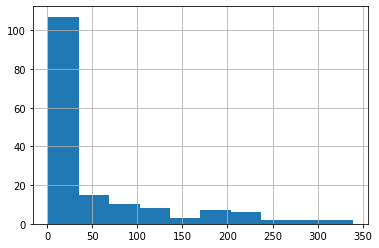

In [ ]:
alcohol.hist();

In [ ]:
# iqr
iqr = alcohol.quantile(.75) - alcohol.quantile(.25)

In [ ]:
iqr

58.25

In [ ]:
# min and max
alcohol.min()

1.0

In [ ]:
alcohol.max()

339.0

In [ ]:
# standard deviation
alcohol.std()

76.13491716376173

In [ ]:
#variance
alcohol.var()

5796.52561153286

In [ ]:
alcohol.std()**2 == alcohol.var()

True

# 11. The describe() Method

In [ ]:
# this method returns a pandas series containing descriptive statistics for our data
alcohol.describe()

count    162.000000
mean      50.746914
std       76.134917
min        1.000000
25%        3.000000
50%       11.500000
75%       61.250000
max      339.000000
Name: wine_servings, dtype: float64

In [ ]:
alcohol.describe(percentiles=[.79, .19])

count    162.000000
mean      50.746914
std       76.134917
min        1.000000
19%        2.000000
50%       11.500000
79%       81.570000
max      339.000000
Name: wine_servings, dtype: float64

In [ ]:
alcohol.describe(percentiles=[.79, .19], include=float, exclude=object)

count    162.000000
mean      50.746914
std       76.134917
min        1.000000
19%        2.000000
50%       11.500000
79%       81.570000
max      339.000000
Name: wine_servings, dtype: float64

# 12. mode() And value_counts()

In [ ]:
# mode
alcohol.mode()

0    1.0
dtype: float64

In [ ]:
alcohol == 1

country
Afghanistan    False
Albania        False
Algeria        False
Andorra        False
Angola         False
               ...  
Venezuela      False
Vietnam         True
Yemen          False
Zambia         False
Zimbabwe       False
Name: wine_servings, Length: 193, dtype: bool

In [ ]:
alcohol[alcohol == 1]

country
Brunei                      1.0
Cambodia                    1.0
Canada                      1.0
Central African Republic    1.0
Chad                        1.0
Comoros                     1.0
DR Congo                    1.0
Egypt                       1.0
Fiji                        1.0
Gambia                      1.0
Ghana                       1.0
Guyana                      1.0
Haiti                       1.0
Jordan                      1.0
Kiribati                    1.0
Malawi                      1.0
Mali                        1.0
Morocco                     1.0
Namibia                     1.0
Nicaragua                   1.0
Niger                       1.0
Oman                        1.0
Papua New Guinea            1.0
Philippines                 1.0
Solomon Islands             1.0
Thailand                    1.0
Tanzania                    1.0
Vietnam                     1.0
Name: wine_servings, dtype: float64

In [ ]:
alcohol[alcohol == 1].size

28

In [ ]:
#value counts
alcohol.value_counts()

1.0      28
2.0      10
7.0       9
8.0       7
5.0       6
         ..
218.0     1
185.0     1
78.0      1
165.0     1
22.0      1
Name: wine_servings, Length: 71, dtype: int64

In [ ]:
alcohol.value_counts().iloc[0]

28

In [ ]:
alcohol.value_counts(normalize=True)

1.0      0.172840
2.0      0.061728
7.0      0.055556
8.0      0.043210
5.0      0.037037
           ...   
218.0    0.006173
185.0    0.006173
78.0     0.006173
165.0    0.006173
22.0     0.006173
Name: wine_servings, Length: 71, dtype: float64

In [ ]:
28/alcohol.count()

0.1728395061728395

# 13. idxmax() And idxmin()

In [ ]:
alcohol.max()

339.0

In [ ]:
alcohol[alcohol == alcohol.max()]

country
Portugal    339.0
Name: wine_servings, dtype: float64

In [ ]:
alcohol[alcohol == alcohol.max()].index

Index(['Portugal'], dtype='object', name='country')

In [ ]:
type(alcohol[alcohol == alcohol.max()].index)

pandas.core.indexes.base.Index

In [ ]:
alcohol[alcohol == alcohol.max()].index[0]

'Portugal'

In [ ]:
alcohol.idxmax()

'Portugal'

In [ ]:
alcohol.idxmin()

'Brunei'

In [ ]:
alcohol.min()

1.0

In [ ]:
alcohol.value_counts().head(1)

1.0    28
Name: wine_servings, dtype: int64

In [ ]:
alcohol[alcohol == alcohol.min()]

country
Brunei                      1.0
Cambodia                    1.0
Canada                      1.0
Central African Republic    1.0
Chad                        1.0
Comoros                     1.0
DR Congo                    1.0
Egypt                       1.0
Fiji                        1.0
Gambia                      1.0
Ghana                       1.0
Guyana                      1.0
Haiti                       1.0
Jordan                      1.0
Kiribati                    1.0
Malawi                      1.0
Mali                        1.0
Morocco                     1.0
Namibia                     1.0
Nicaragua                   1.0
Niger                       1.0
Oman                        1.0
Papua New Guinea            1.0
Philippines                 1.0
Solomon Islands             1.0
Thailand                    1.0
Tanzania                    1.0
Vietnam                     1.0
Name: wine_servings, dtype: float64

In [ ]:
alcohol[alcohol == alcohol.max()]

country
Portugal    339.0
Name: wine_servings, dtype: float64

In [ ]:
alcohol[alcohol.idxmax()]

339.0

In [ ]:
alcohol.max()

339.0

# 14. Sorting With sort_values()

In [ ]:
alcohol.sort_values()

country
Thailand           1.0
Solomon Islands    1.0
Brunei             1.0
Haiti              1.0
Cambodia           1.0
                  ... 
Sri Lanka          NaN
Sudan              NaN
Tajikistan         NaN
Uganda             NaN
Yemen              NaN
Name: wine_servings, Length: 193, dtype: float64

In [ ]:
alcohol.sort_values(ascending=False)

country
Portugal      339.0
Andorra       312.0
Denmark       278.0
Slovenia      276.0
Luxembourg    271.0
              ...  
Sri Lanka       NaN
Sudan           NaN
Tajikistan      NaN
Uganda          NaN
Yemen           NaN
Name: wine_servings, Length: 193, dtype: float64

In [ ]:
alcohol.sort_values(ascending=False, na_position='first')

country
Afghanistan                 NaN
Bangladesh                  NaN
Bhutan                      NaN
Burundi                     NaN
North Korea                 NaN
                           ... 
Jordan                      1.0
Solomon Islands             1.0
Central African Republic    1.0
Haiti                       1.0
Chad                        1.0
Name: wine_servings, Length: 193, dtype: float64

In [ ]:
alcohol.sort_values(ascending=False, na_position='last')

country
Portugal      339.0
Andorra       312.0
Denmark       278.0
Slovenia      276.0
Luxembourg    271.0
              ...  
Sri Lanka       NaN
Sudan           NaN
Tajikistan      NaN
Uganda          NaN
Yemen           NaN
Name: wine_servings, Length: 193, dtype: float64

In [ ]:
alcohol.sort_values(ascending=False, na_position='last', kind='quicksort') #mergesort, heapsort

country
Portugal      339.0
Andorra       312.0
Denmark       278.0
Slovenia      276.0
Luxembourg    271.0
              ...  
Sri Lanka       NaN
Sudan           NaN
Tajikistan      NaN
Uganda          NaN
Yemen           NaN
Name: wine_servings, Length: 193, dtype: float64

# 15. nlargest() And nsmallest()

In [ ]:
alcohol.min()

1.0

In [ ]:
alcohol.max()

339.0

In [ ]:
alcohol.sort_values(ascending=False).head(10)

country
Portugal             339.0
Andorra              312.0
Denmark              278.0
Slovenia             276.0
Luxembourg           271.0
Croatia              254.0
Italy                237.0
Equatorial Guinea    233.0
Argentina            221.0
Greece               218.0
Name: wine_servings, dtype: float64

In [ ]:
alcohol.sort_values(ascending=False)[:10]

country
Portugal             339.0
Andorra              312.0
Denmark              278.0
Slovenia             276.0
Luxembourg           271.0
Croatia              254.0
Italy                237.0
Equatorial Guinea    233.0
Argentina            221.0
Greece               218.0
Name: wine_servings, dtype: float64

In [ ]:
alcohol.nlargest(n=10)

country
Portugal             339.0
Andorra              312.0
Denmark              278.0
Slovenia             276.0
Luxembourg           271.0
Croatia              254.0
Italy                237.0
Equatorial Guinea    233.0
Argentina            221.0
Greece               218.0
Name: wine_servings, dtype: float64

In [ ]:
alcohol.nsmallest(29)

country
Brunei                      1.0
Cambodia                    1.0
Canada                      1.0
Central African Republic    1.0
Chad                        1.0
Comoros                     1.0
DR Congo                    1.0
Egypt                       1.0
Fiji                        1.0
Gambia                      1.0
Ghana                       1.0
Guyana                      1.0
Haiti                       1.0
Jordan                      1.0
Kiribati                    1.0
Malawi                      1.0
Mali                        1.0
Morocco                     1.0
Namibia                     1.0
Nicaragua                   1.0
Niger                       1.0
Oman                        1.0
Papua New Guinea            1.0
Philippines                 1.0
Solomon Islands             1.0
Thailand                    1.0
Tanzania                    1.0
Vietnam                     1.0
El Salvador                 2.0
Name: wine_servings, dtype: float64

# 16. Sorting With sort_index()

In [ ]:
alcohol.head()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [ ]:
alcohol.sort_index()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            NaN
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

In [ ]:
alcohol.sort_index(ascending=False, na_position='first')

country
Zimbabwe         4.0
Zambia           4.0
Yemen            NaN
Vietnam          1.0
Venezuela        3.0
               ...  
Angola          45.0
Andorra        312.0
Algeria         14.0
Albania         54.0
Afghanistan      NaN
Name: wine_servings, Length: 193, dtype: float64

In [ ]:
alcohol.index.isnull().sum()

0

In [ ]:
alcohol.sort_index(ascending=False, na_position='first', inplace=True)

In [ ]:
alcohol.head()

country
Zimbabwe     4.0
Zambia       4.0
Yemen        NaN
Vietnam      1.0
Venezuela    3.0
Name: wine_servings, dtype: float64

# 17. Skill Challenge

1. Select all the countries from alcohol that have more than 50 wine servings and save them (and the corresponding values) in a variable fifty_plus.

In [ ]:
fifty_plus = alcohol[alcohol > 50]

In [ ]:
fifty_plus.head()

country
United Kingdom    195.0
USA                84.0
Sweden            186.0
St. Lucia          71.0
Spain             112.0
Name: wine_servings, dtype: float64

In [ ]:
fifty_plus.count()

48

2. From fifty_plus, choose the countries with the smallest 20 wine servings values.

In [ ]:
fifty_plus.nsmallest(20)

country
Seychelles             51.0
Bahamas                51.0
Albania                54.0
Poland                 56.0
Lithuania              56.0
Gabon                  59.0
Estonia                59.0
Latvia                 62.0
St. Lucia              71.0
Russian Federation     73.0
Paraguay               74.0
Cook Islands           74.0
Iceland                78.0
South Africa           81.0
USA                    84.0
Macedonia              86.0
Bulgaria               94.0
Finland                97.0
Spain                 112.0
Cyprus                113.0
Name: wine_servings, dtype: float64

3. What is the mean, median and stantard deviation for the sample from Step 2?

In [ ]:
fifty_plus.nsmallest(n=20).describe()

count     20.000000
mean      74.250000
std       19.072921
min       51.000000
25%       58.250000
50%       73.500000
75%       84.500000
max      113.000000
Name: wine_servings, dtype: float64

In [ ]:
fifty_plus.nsmallest(n=20).median()

73.5

In [ ]:
fifty_plus.nsmallest(n=20).mean()

74.25

In [ ]:
fifty_plus.nsmallest(n=20).std()

19.07292100831631

# 18. Series Arithmetics And fill_value()

In [ ]:
alcohol + 2

country
Zimbabwe         6.0
Zambia           6.0
Yemen            NaN
Vietnam          3.0
Venezuela        5.0
               ...  
Angola          47.0
Andorra        314.0
Algeria         16.0
Albania         56.0
Afghanistan      NaN
Name: wine_servings, Length: 193, dtype: float64

In [ ]:
(alcohol -10) * 2

country
Zimbabwe       -12.0
Zambia         -12.0
Yemen            NaN
Vietnam        -18.0
Venezuela      -14.0
               ...  
Angola          70.0
Andorra        604.0
Algeria          8.0
Albania         88.0
Afghanistan      NaN
Name: wine_servings, Length: 193, dtype: float64

In [ ]:
alcohol.sort_index(inplace=True)

In [ ]:
alcohol.head()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [ ]:
more_drinks = pd.Series({'Albania': 6, 'Algeria': 10})

In [ ]:
alcohol + more_drinks

Afghanistan     NaN
Albania        60.0
Algeria        24.0
Andorra         NaN
Angola          NaN
               ... 
Venezuela       NaN
Vietnam         NaN
Yemen           NaN
Zambia          NaN
Zimbabwe        NaN
Length: 193, dtype: float64

In [ ]:
alcohol.add(more_drinks, fill_value=0)

Afghanistan      NaN
Albania         60.0
Algeria         24.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            NaN
Zambia           4.0
Zimbabwe         4.0
Length: 193, dtype: float64

In [ ]:
more_drinks = pd.Series({'Albania': 6, 'Algeria': 10, 'Afghanistan': 100, 'Yemen': 101})

In [ ]:
alcohol.add(more_drinks, fill_value=0)

Afghanistan    100.0
Albania         60.0
Algeria         24.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen          101.0
Zambia           4.0
Zimbabwe         4.0
Length: 193, dtype: float64

In [ ]:
more_drinks = pd.Series({'Albania': 6, 'Alberia': 19 ,'Algeria': 10, 'Afghanistan': 100, 'Yemen': 101})

In [ ]:
alcohol.add(more_drinks, fill_value=0)

Afghanistan    100.0
Albania         60.0
Alberia         19.0
Algeria         24.0
Andorra        312.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen          101.0
Zambia           4.0
Zimbabwe         4.0
Length: 194, dtype: float64

In [ ]:
alcohol - more_drinks

Afghanistan     NaN
Albania        48.0
Alberia         NaN
Algeria         4.0
Andorra         NaN
               ... 
Venezuela       NaN
Vietnam         NaN
Yemen           NaN
Zambia          NaN
Zimbabwe        NaN
Length: 194, dtype: float64

In [ ]:
alcohol.subtract(more_drinks, fill_value=0)

Afghanistan   -100.0
Albania         48.0
Alberia        -19.0
Algeria          4.0
Andorra        312.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen         -101.0
Zambia           4.0
Zimbabwe         4.0
Length: 194, dtype: float64

In [ ]:
alcohol.divide(more_drinks, fill_value=1)

Afghanistan      0.010000
Albania          9.000000
Alberia          0.052632
Algeria          1.400000
Andorra        312.000000
                  ...    
Venezuela        3.000000
Vietnam          1.000000
Yemen            0.009901
Zambia           4.000000
Zimbabwe         4.000000
Length: 194, dtype: float64

In [ ]:
alcohol.multiply(more_drinks, fill_value=1)

Afghanistan    100.0
Albania        324.0
Alberia         19.0
Algeria        140.0
Andorra        312.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen          101.0
Zambia           4.0
Zimbabwe         4.0
Length: 194, dtype: float64

In [ ]:
alcohol.head()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [ ]:
more_drinks.head()

Albania          6
Alberia         19
Algeria         10
Afghanistan    100
Yemen          101
dtype: int64

# 19. BONUS: Calculating Variance And Standard Deviation


In [ ]:
alcohol.var()

5796.52561153286

In [ ]:
alcohol.subtract(alcohol.mean())**2

country
Afghanistan             NaN
Albania           10.582571
Algeria         1350.335658
Andorra        68253.175164
Angola            33.027016
                   ...     
Venezuela       2279.767756
Vietnam         2474.755411
Yemen                   NaN
Zambia          2185.273929
Zimbabwe        2185.273929
Name: wine_servings, Length: 193, dtype: float64

In [ ]:
(alcohol.subtract(alcohol.mean())**2).sum()

933240.6234567901

In [ ]:
(alcohol.subtract(alcohol.mean())**2).sum() / (alcohol.count()-1)

5796.5256115328575

In [ ]:
alcohol.std()

76.13491716376173

In [ ]:
((alcohol.subtract(alcohol.mean())**2).sum() / (alcohol.count()-1))**(1/2)

76.13491716376171

# 20. Cumulative Operations

In [ ]:
alcohol.sum()

8221.0

In [ ]:
alcohol.cumsum()

country
Afghanistan       NaN
Albania          54.0
Algeria          68.0
Andorra         380.0
Angola          425.0
                ...  
Venezuela      8212.0
Vietnam        8213.0
Yemen             NaN
Zambia         8217.0
Zimbabwe       8221.0
Name: wine_servings, Length: 193, dtype: float64

In [ ]:
alcohol.cumsum(skipna=True)

country
Afghanistan       NaN
Albania          54.0
Algeria          68.0
Andorra         380.0
Angola          425.0
                ...  
Venezuela      8212.0
Vietnam        8213.0
Yemen             NaN
Zambia         8217.0
Zimbabwe       8221.0
Name: wine_servings, Length: 193, dtype: float64

In [ ]:
alcohol.cumsum(skipna=False)

country
Afghanistan   NaN
Albania       NaN
Algeria       NaN
Andorra       NaN
Angola        NaN
               ..
Venezuela     NaN
Vietnam       NaN
Yemen         NaN
Zambia        NaN
Zimbabwe      NaN
Name: wine_servings, Length: 193, dtype: float64

In [ ]:
np.NaN + 51651651

nan

In [ ]:
pd.NA + 516651

<NA>

In [ ]:
alcohol.prod()

3.4276115052182805e+183

In [ ]:
alcohol.cumprod()

country
Afghanistan              NaN
Albania         5.400000e+01
Algeria         7.560000e+02
Andorra         2.358720e+05
Angola          1.061424e+07
                   ...      
Venezuela      2.142257e+182
Vietnam        2.142257e+182
Yemen                    NaN
Zambia         8.569029e+182
Zimbabwe       3.427612e+183
Name: wine_servings, Length: 193, dtype: float64

In [ ]:
alcohol.cumprod()[-1] == alcohol.prod()

True

In [ ]:
# cummin cummax

In [ ]:
alcohol.min()

1.0

In [ ]:
alcohol.cummin()

country
Afghanistan     NaN
Albania        54.0
Algeria        14.0
Andorra        14.0
Angola         14.0
               ... 
Venezuela       1.0
Vietnam         1.0
Yemen           NaN
Zambia          1.0
Zimbabwe        1.0
Name: wine_servings, Length: 193, dtype: float64

In [ ]:
alcohol.max()

339.0

In [ ]:
alcohol.cummax()

country
Afghanistan      NaN
Albania         54.0
Algeria         54.0
Andorra        312.0
Angola         312.0
               ...  
Venezuela      339.0
Vietnam        339.0
Yemen            NaN
Zambia         339.0
Zimbabwe       339.0
Name: wine_servings, Length: 193, dtype: float64

In [ ]:
alcohol.head()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

# 21. Pairwise Differences With diff()

In [ ]:
alcohol.head()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [ ]:
# difference between one element and the other... specifically the next element in the series minus the previous.
alcohol.diff().head()

country
Afghanistan      NaN
Albania          NaN
Algeria        -40.0
Andorra        298.0
Angola        -267.0
Name: wine_servings, dtype: float64

In [ ]:
alcohol.diff(periods=2).head()

country
Afghanistan      NaN
Albania          NaN
Algeria          NaN
Andorra        258.0
Angola          31.0
Name: wine_servings, dtype: float64

# 22. Series Iteration

In [ ]:
mini_alc = alcohol[:10]

In [ ]:
mini_alc

country
Afghanistan            NaN
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
Argentina            221.0
Armenia               11.0
Australia            212.0
Austria              191.0
Name: wine_servings, dtype: float64

In [ ]:
for i in mini_alc:
  print(i)

nan
54.0
14.0
312.0
45.0
45.0
221.0
11.0
212.0
191.0


In [ ]:
for i in mini_alc.index:
  print(i)

Afghanistan
Albania
Algeria
Andorra
Angola
Antigua & Barbuda
Argentina
Armenia
Australia
Austria


In [ ]:
for i in mini_alc.index:
  print(i, mini_alc[i])

Afghanistan nan
Albania 54.0
Algeria 14.0
Andorra 312.0
Angola 45.0
Antigua & Barbuda 45.0
Argentina 221.0
Armenia 11.0
Australia 212.0
Austria 191.0


In [ ]:
for i in mini_alc.items():
  print(i)

('Afghanistan', nan)
('Albania', 54.0)
('Algeria', 14.0)
('Andorra', 312.0)
('Angola', 45.0)
('Antigua & Barbuda', 45.0)
('Argentina', 221.0)
('Armenia', 11.0)
('Australia', 212.0)
('Austria', 191.0)


In [ ]:
for i in mini_alc.iteritems():
  print(i)

('Afghanistan', nan)
('Albania', 54.0)
('Algeria', 14.0)
('Andorra', 312.0)
('Angola', 45.0)
('Antigua & Barbuda', 45.0)
('Argentina', 221.0)
('Armenia', 11.0)
('Australia', 212.0)
('Austria', 191.0)


# 23. Filtering: filter(), where() And mask()

In [ ]:
# regex = regular expressions
alcohol.filter(regex='^V')

country
Vanuatu      11.0
Venezuela     3.0
Vietnam       1.0
Name: wine_servings, dtype: float64

In [ ]:
alcohol.filter(like='stan')

country
Afghanistan      NaN
Kazakhstan      12.0
Kyrgyzstan       6.0
Pakistan         NaN
Tajikistan       NaN
Turkmenistan    32.0
Uzbekistan       8.0
Name: wine_servings, dtype: float64

In [ ]:
alcohol[alcohol > 200]

country
Andorra              312.0
Argentina            221.0
Australia            212.0
Belgium              212.0
Croatia              254.0
Denmark              278.0
Equatorial Guinea    233.0
Greece               218.0
Italy                237.0
Luxembourg           271.0
Portugal             339.0
Slovenia             276.0
Name: wine_servings, dtype: float64

In [ ]:
alcohol.loc[alcohol > 200]

country
Andorra              312.0
Argentina            221.0
Australia            212.0
Belgium              212.0
Croatia              254.0
Denmark              278.0
Equatorial Guinea    233.0
Greece               218.0
Italy                237.0
Luxembourg           271.0
Portugal             339.0
Slovenia             276.0
Name: wine_servings, dtype: float64

In [ ]:
def gt200(x):
  return x > 200

In [ ]:
alcohol[gt200]

country
Andorra              312.0
Argentina            221.0
Australia            212.0
Belgium              212.0
Croatia              254.0
Denmark              278.0
Equatorial Guinea    233.0
Greece               218.0
Italy                237.0
Luxembourg           271.0
Portugal             339.0
Slovenia             276.0
Name: wine_servings, dtype: float64

In [ ]:
# the where() method

In [ ]:
alcohol.where(lambda x: x > 200, other='too small')

country
Afghanistan    too small
Albania        too small
Algeria        too small
Andorra            312.0
Angola         too small
                 ...    
Venezuela      too small
Vietnam        too small
Yemen          too small
Zambia         too small
Zimbabwe       too small
Name: wine_servings, Length: 193, dtype: object

In [ ]:
alcohol.where(lambda x: x > 200).dropna()

country
Andorra              312.0
Argentina            221.0
Australia            212.0
Belgium              212.0
Croatia              254.0
Denmark              278.0
Equatorial Guinea    233.0
Greece               218.0
Italy                237.0
Luxembourg           271.0
Portugal             339.0
Slovenia             276.0
Name: wine_servings, dtype: float64

In [ ]:
alcohol.where(lambda x: x <= 200).dropna()

country
Albania              54.0
Algeria              14.0
Angola               45.0
Antigua & Barbuda    45.0
Armenia              11.0
                     ... 
Vanuatu              11.0
Venezuela             3.0
Vietnam               1.0
Zambia                4.0
Zimbabwe              4.0
Name: wine_servings, Length: 150, dtype: float64

In [ ]:
# the mask() method
# mask replaces where the condition is TRUE

In [ ]:
alcohol.mask(lambda x: x>200).dropna()

country
Albania              54.0
Algeria              14.0
Angola               45.0
Antigua & Barbuda    45.0
Armenia              11.0
                     ... 
Vanuatu              11.0
Venezuela             3.0
Vietnam               1.0
Zambia                4.0
Zimbabwe              4.0
Name: wine_servings, Length: 150, dtype: float64

# 24. Transforming With update(), apply() And map()

In [ ]:
alcohol.head(10)

country
Afghanistan            NaN
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
Argentina            221.0
Armenia               11.0
Australia            212.0
Austria              191.0
Name: wine_servings, dtype: float64

In [ ]:
# spot vs global transform

In [ ]:
alcohol.loc['Algeria'] = 19

In [ ]:
alcohol.head(10)

country
Afghanistan            NaN
Albania               54.0
Algeria               19.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
Argentina            221.0
Armenia               11.0
Australia            212.0
Austria              191.0
Name: wine_servings, dtype: float64

In [ ]:
alcohol.loc['Albania'] = 190
alcohol.loc['Afghanistan'] = 20
alcohol.loc['Andorra'] = 29

In [ ]:
alcohol.head(10)

country
Afghanistan           20.0
Albania              190.0
Algeria               19.0
Andorra               29.0
Angola                45.0
Antigua & Barbuda     45.0
Argentina            221.0
Armenia               11.0
Australia            212.0
Austria              191.0
Name: wine_servings, dtype: float64

In [ ]:
# the update() method

In [ ]:
alcohol.update(pd.Series(data=[200, 20], index=['Albania', 'Algeria']))

In [ ]:
alcohol.head(10)

country
Afghanistan           20.0
Albania              200.0
Algeria               20.0
Andorra               29.0
Angola                45.0
Antigua & Barbuda     45.0
Argentina            221.0
Armenia               11.0
Australia            212.0
Austria              191.0
Name: wine_servings, dtype: float64

In [ ]:
# the apply() method

In [ ]:
alcohol.apply(lambda x: x**2)

country
Afghanistan      400.0
Albania        40000.0
Algeria          400.0
Andorra          841.0
Angola          2025.0
                ...   
Venezuela          9.0
Vietnam            1.0
Yemen              NaN
Zambia            16.0
Zimbabwe          16.0
Name: wine_servings, Length: 193, dtype: float64

In [ ]:
alcohol.apply(np.square)

country
Afghanistan      400.0
Albania        40000.0
Algeria          400.0
Andorra          841.0
Angola          2025.0
                ...   
Venezuela          9.0
Vietnam            1.0
Yemen              NaN
Zambia            16.0
Zimbabwe          16.0
Name: wine_servings, Length: 193, dtype: float64

In [ ]:
def multiply_by_self(x):
  return x*x

In [ ]:
alcohol.apply(multiply_by_self)

country
Afghanistan      400.0
Albania        40000.0
Algeria          400.0
Andorra          841.0
Angola          2025.0
                ...   
Venezuela          9.0
Vietnam            1.0
Yemen              NaN
Zambia            16.0
Zimbabwe          16.0
Name: wine_servings, Length: 193, dtype: float64

In [ ]:
def multiply_by_self_with_min(x, min_servings):
  if x < min_servings:
    return x**2

  return x

In [ ]:
alcohol.apply(multiply_by_self_with_min, args=(200, ))

country
Afghanistan     400.0
Albania         200.0
Algeria         400.0
Andorra         841.0
Angola         2025.0
                ...  
Venezuela         9.0
Vietnam           1.0
Yemen             NaN
Zambia           16.0
Zimbabwe         16.0
Name: wine_servings, Length: 193, dtype: float64

In [ ]:
alcohol.head()

country
Afghanistan     20.0
Albania        200.0
Algeria         20.0
Andorra         29.0
Angola          45.0
Name: wine_servings, dtype: float64

In [ ]:
alcohol.apply(multiply_by_self_with_min, min_servings=200)

country
Afghanistan     400.0
Albania         200.0
Algeria         400.0
Andorra         841.0
Angola         2025.0
                ...  
Venezuela         9.0
Vietnam           1.0
Yemen             NaN
Zambia           16.0
Zimbabwe         16.0
Name: wine_servings, Length: 193, dtype: float64

In [ ]:
# the map() method

In [ ]:
alcohol.map(lambda x: x**2)

country
Afghanistan      400.0
Albania        40000.0
Algeria          400.0
Andorra          841.0
Angola          2025.0
                ...   
Venezuela          9.0
Vietnam            1.0
Yemen              NaN
Zambia            16.0
Zimbabwe          16.0
Name: wine_servings, Length: 193, dtype: float64

In [ ]:
alcohol.map(np.square)

country
Afghanistan      400.0
Albania        40000.0
Algeria          400.0
Andorra          841.0
Angola          2025.0
                ...   
Venezuela          9.0
Vietnam            1.0
Yemen              NaN
Zambia            16.0
Zimbabwe          16.0
Name: wine_servings, Length: 193, dtype: float64

# 25. Skill Challenge

1. Read the drinks.csv dataset again, this time bringing in the beer_servings sequence into a new series with country again acting as the index. Assign this series to the variable beers. Links to data: https://andybek.com/pandas-drinks


In [ ]:
data_url = 'https://andybek.com/pandas-drinks'

In [ ]:
beers = pd.read_csv(data_url)

In [ ]:
beers.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,NaN,NaN,NaN,NaN
1,Albania,89.0,132.0,54.0,4.9
2,Algeria,25.0,NaN,14.0,0.7
3,Andorra,245.0,138.0,312.0,12.4
4,Angola,217.0,57.0,45.0,5.9


In [ ]:
beers = pd.read_csv(data_url, usecols=['country', 'beer_servings'])

In [ ]:
beers.head()

,country,beer_servings
0,Afghanistan,NaN
1,Albania,89.0
2,Algeria,25.0
3,Andorra,245.0
4,Angola,217.0


In [ ]:
beers = pd.read_csv(data_url, usecols=['country', 'beer_servings'], index_col='country')

In [ ]:
beers.head()

,beer_servings
country,
Afghanistan,NaN
Albania,89.0
Algeria,25.0
Andorra,245.0
Angola,217.0


In [ ]:
type(beers)

pandas.core.frame.DataFrame

In [ ]:
beers = pd.read_csv(data_url, usecols=['country', 'beer_servings'], index_col='country', squeeze=True)

In [ ]:
beers.head()

country
Afghanistan      NaN
Albania         89.0
Algeria         25.0
Andorra        245.0
Angola         217.0
Name: beer_servings, dtype: float64

In [ ]:
type(beers)

pandas.core.series.Series

2. Calculate the mean, median and standard deviation of beer servings in beers. Is the distribution right or left skewed?

In [ ]:
beers.mean()

102.87078651685393

In [ ]:
beers.median()

60.0

In [ ]:
beers.quantile(.5)

60.0

In [ ]:
beers.std()

100.64571267934778

In [ ]:
beers.var()**(1/2)

100.64571267934778

In [ ]:
np.sqrt(beers.var())

100.64571267934778

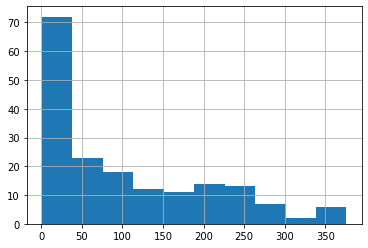

In [ ]:
beers.hist()

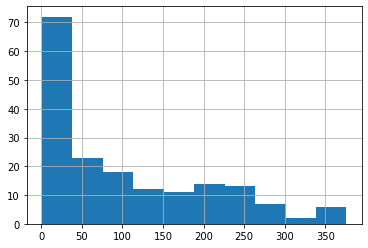

In [ ]:
beers.hist();

In [ ]:
beers.describe()

count    178.000000
mean     102.870787
std      100.645713
min        1.000000
25%       21.000000
50%       60.000000
75%      172.500000
max      376.000000
Name: beer_servings, dtype: float64

3. Slice the first 10 countries from beers. Are these relatively large or smalll relative to the rest of the sample?
BONUS: To answer that, we could compare each value to the mean or median. An even better approach would be to calculate standard scores or z-scores as they are known.

4. Create a new series that users series arithmetics to calculate the z-score for each serving by subtracting from each the mean and dividing the difference by the standard deviation. Point the variable z_scores to this series. Which country has the largest absolute z-score? Is this a positive or negative deviation?

In [ ]:
beers[:10]

country
Afghanistan            NaN
Albania               89.0
Algeria               25.0
Andorra              245.0
Angola               217.0
Antigua & Barbuda     12.0
Argentina            193.0
Armenia               21.0
Australia            261.0
Austria              279.0
Name: beer_servings, dtype: float64

In [ ]:
beers.head(10)

country
Afghanistan            NaN
Albania               89.0
Algeria               25.0
Andorra              245.0
Angola               217.0
Antigua & Barbuda     12.0
Argentina            193.0
Armenia               21.0
Australia            261.0
Austria              279.0
Name: beer_servings, dtype: float64

In [ ]:
beers.mean()

102.87078651685393

In [ ]:
beers[:10] - beers.mean()

country
Afghanistan                 NaN
Albania              -13.870787
Algeria              -77.870787
Andorra              142.129213
Angola               114.129213
Antigua & Barbuda    -90.870787
Argentina             90.129213
Armenia              -81.870787
Australia            158.129213
Austria              176.129213
Name: beer_servings, dtype: float64

In [ ]:
(beers[:10] - beers.mean()).apply(lambda x: 'low' if x<0 else 'high')

country
Afghanistan          high
Albania               low
Algeria               low
Andorra              high
Angola               high
Antigua & Barbuda     low
Argentina            high
Armenia               low
Australia            high
Austria              high
Name: beer_servings, dtype: object

In [ ]:
(beers - beers.mean()).apply(lambda x: 'low' if x<0 else 'high').value_counts()

low     112
high     81
Name: beer_servings, dtype: int64

In [ ]:
z_scores = (beers - beers.mean())/beers.std()

In [ ]:
z_scores.head(10)

country
Afghanistan               NaN
Albania             -0.137818
Algeria             -0.773712
Andorra              1.412174
Angola               1.133970
Antigua & Barbuda   -0.902878
Argentina            0.895510
Armenia             -0.813455
Australia            1.571147
Austria              1.749992
Name: beer_servings, dtype: float64

In [ ]:
z_scores.min()

-1.012172141315241

In [ ]:
z_scores.max()

2.7137689844109123

In [ ]:
z_scores.abs()

country
Afghanistan         NaN
Albania        0.137818
Algeria        0.773712
Andorra        1.412174
Angola         1.133970
                 ...   
Venezuela      2.286528
Vietnam        0.080771
Yemen          0.962493
Zambia         0.704161
Zimbabwe       0.386214
Name: beer_servings, Length: 193, dtype: float64

In [ ]:
z_scores.abs().max()

2.7137689844109123

In [ ]:
beers.idxmax()

'Namibia'

In [ ]:
beers['Namibia']

376.0

In [ ]:
beers[beers.idxmax()]

376.0

In [ ]:
z_scores.abs().max() * beers.std() + beers.mean()

376.0